# Data Visualization on COVID-19 cases in Indonesia (2 - 31 March 2020)
## Dataset
Data Set 1 : historical data related to covid cases in Indonesia <br>
Data Set 2 : spatial data related to covid cases for every province in Indonesia



## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
import seaborn as sns

## Import Data

In [ ]:
df_ds1 = pd.read_csv('Data Set 1.csv')
df_ds2 = pd.read_csv('Data Set 2.csv')

df_ds1.tail()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated
25,27-Mar-20,1439,5775,153,1046,4729,0,913
26,28-Mar-20,491,6266,109,1155,5111,0,994
27,29-Mar-20,268,6534,130,1285,5249,0,1107
28,30-Mar-20,129,6663,129,1414,5249,0,1217
29,31-Mar-20,114,6777,114,1528,5249,0,1311


## Section 1 :
comparison of the cumulative number of test samples,
confirmed positive and confirmed negative for the available time period using line plot

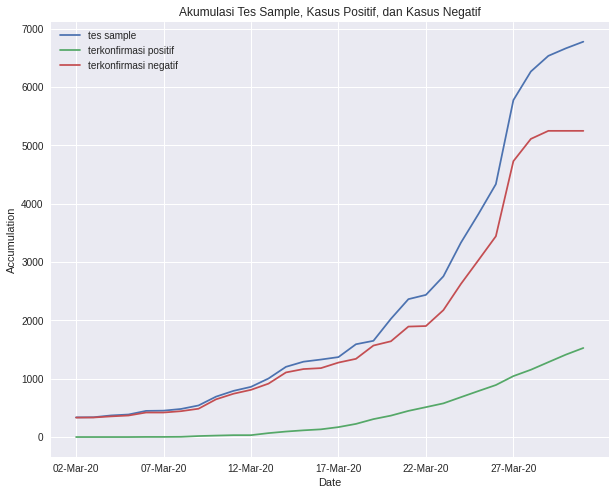

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(np.arange(0,30 , 5))
plt.plot(df_ds1['date'],df_ds1['acc_tested'],label='tes sample')
plt.plot(df_ds1['date'],df_ds1['acc_confirmed'],label='terkonfirmasi positif')
plt.plot(df_ds1['date'],df_ds1['acc_negative'],label='terkonfirmasi negatif')
plt.legend()
plt.title('Akumulasi Tes Sample, Kasus Positif, dan Kasus Negatif')
plt.ylabel('Accumulation')
plt.xlabel('Date')

plt.show()

##Section 2 :
*   positive rate dan negative rate for every timestamp.
*   positivity rate dan
negativity rate comparison using barplot
*  On what date does the positive rate show the highest value?
* On what date does the negative rate show the highest value?




### Positive Rate & Negative Rate 

In [ ]:
df_pnr = df_ds1
df_pnr['pstv_rate']= df_pnr['acc_confirmed']/df_pnr['acc_tested']*100
df_pnr['ngtv_rate']= df_pnr['acc_negative']/df_pnr['acc_tested']*100
df_pnr.head()

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,pstv_rate,ngtv_rate
0,02-Mar-20,339,339,2,2,335,2,2,0.589971,98.820059
1,03-Mar-20,2,341,0,2,337,2,2,0.586510,98.826979
2,04-Mar-20,31,372,0,2,356,14,2,0.537634,95.698925
3,05-Mar-20,16,388,0,2,371,15,2,0.515464,95.618557
4,06-Mar-20,62,450,2,4,422,24,4,0.888889,93.777778


### Perbandingan Positivity Rate & Negativity Rate Menggunakan Horizontal Bar Plot

Text(0.5, 0, 'Rate')

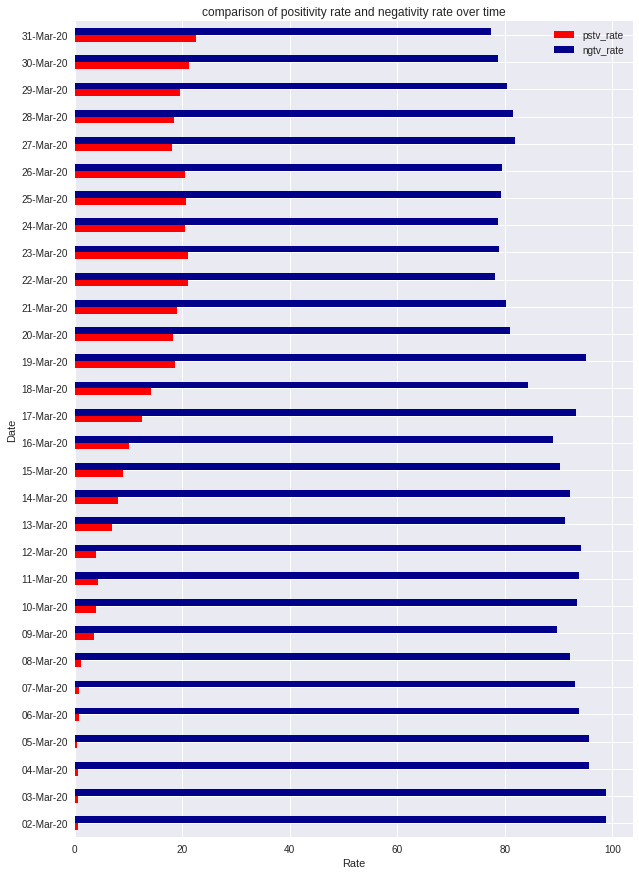

In [ ]:
df_rate = df_pnr[['pstv_rate','ngtv_rate','date']]
df_rate.set_index('date', inplace=True)
df_rate.plot(kind='barh',figsize=(10,15),color=['red','darkblue'])

plt.title('comparison of positivity rate and negativity rate over time')
plt.ylabel('Date')
plt.xlabel('Rate')

### Highest Positive Rate

In [ ]:
max_pstv = df_pnr[df_pnr.pstv_rate == df_pnr.pstv_rate.max()]
max_pstv[['date','pstv_rate','ngtv_rate']]

,date,pstv_rate,ngtv_rate
29,31-Mar-20,22.54685,77.45315


### Highest Negative Rate 

In [ ]:
max_ngtv = df_pnr[df_pnr.ngtv_rate == df_pnr.ngtv_rate.max()]
max_ngtv[['date','pstv_rate','ngtv_rate']]

,date,pstv_rate,ngtv_rate
1,03-Mar-20,0.58651,98.826979


## Section 3 : Correlation between variables
* Show the correlations between variables in the dataset using heatmap
* Variables that have the most positive correlation value
* Variables that have the most negative correlation value

### Correlations between variables in the dataset using heatmap

acc_confirmed    1.000000
isolated         0.999920
acc_tested       0.992487
acc_negative     0.987653
new_confirmed    0.925703
pstv_rate        0.820484
new_tested       0.488240
being_checked   -0.599737
ngtv_rate       -0.816270
Name: acc_confirmed, dtype: float64 



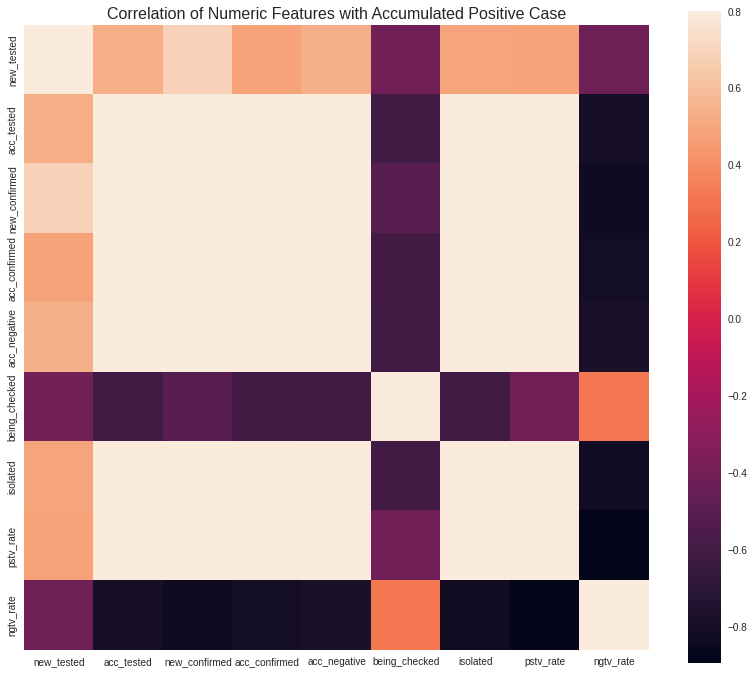

In [ ]:
#extract numeric features
numeric_features = df_ds1.select_dtypes(include=[np.number])
numeric_features.columns

#Finding correlation between numeric features and acc_confirmed
correlation = numeric_features.corr()
print(correlation['acc_confirmed'].sort_values(ascending = False),'\n')

#heatmap
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Accumulated Positive Case',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

Index(['acc_confirmed', 'isolated', 'acc_tested', 'acc_negative',
       'new_confirmed', 'pstv_rate', 'new_tested', 'being_checked',
       'ngtv_rate'],
      dtype='object')


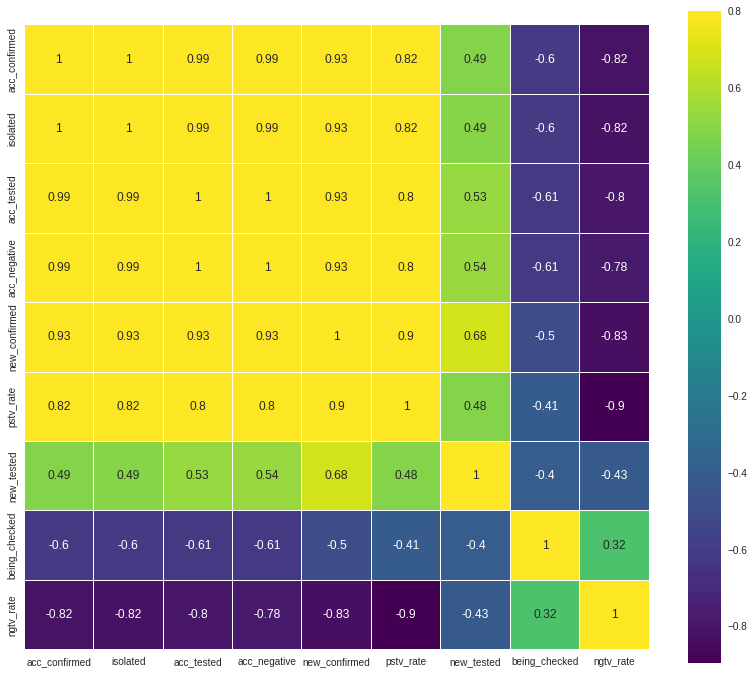

In [ ]:
k= 11
cols = correlation.nlargest(k,'acc_confirmed')['acc_confirmed'].index
print(cols)
cm = np.corrcoef(df_ds1[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

From the two heatmaps, it can be seen that the **isolated** variable has a very high (most positive) correlation value to **acc_confirmed** which means that the value of the **isolated** variable has the greatest influence on the **acc_confirmed** variable, while the **ngtv_rate** variable has a very low (most negative) correlation value which means that the value of the **ngtv_rate** variable has a very small effect on the value of the **acc_confirmed** variable

## Section 4 : Comparison of confirmed case for every province
* Percentage ratio of the number of confirmed positive to
population per km2 for each province
* Display the comparison of the percentage values for every province using barplot.
* Show the 3 provinces with the largest percentage value along with the percentage value.


### Calculating the Comparison of the Number of Confirmed Positives to the Population/km2 (*copk_rate*) for Each Province

In [ ]:
df_ds2['copk_rate']=df_ds2['confirmed']/df_ds2['population_kmsquare']*100
df_ds2.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude,copk_rate
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994,4.651163
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731,1.219512
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299,6.471495
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725,0.000000
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382,1.940035


### Comparison of *copk_rate* Values for Each Province Using Horizontal Bar Plot

Text(0.5, 0, 'Rate')

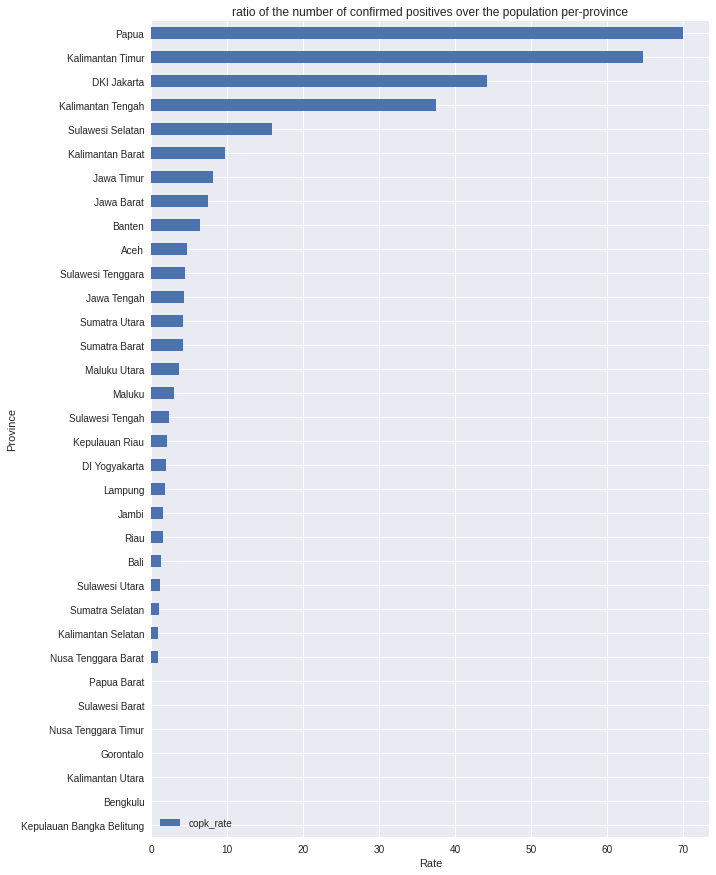

In [ ]:
df_copk= df_ds2[['copk_rate','province_name']]
copk_sorted = df_copk.sort_values('copk_rate',ascending=True)
copk_sorted.set_index('province_name',inplace=True)

copk_sorted.plot(kind='barh',figsize=(10,15))
plt.title('ratio of the number of confirmed positives over the population per-province')
plt.ylabel('Province')
plt.xlabel('Rate')

### Top 3 Provinces with the highest *copk_rate*

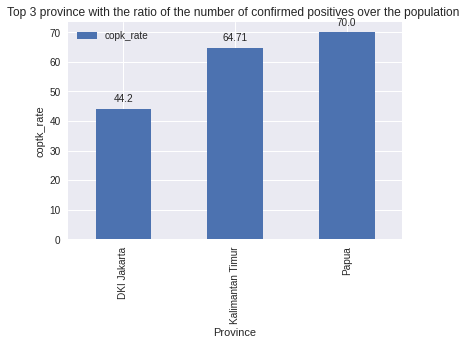

In [ ]:
top3_copk = copk_sorted.tail(3)
ax = top3_copk.plot(kind='bar')
plt.title('Top 3 province with the ratio of the number of confirmed positives over the population ')
plt.ylabel('coptk_rate')
plt.xlabel('Province')
# Add value in the top of bar 
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')

## Section 5 : Positive case comparison for every island
* display the percentage of positive confirmed counts for each island using pie chart

### Percentage of Number of Confirmed Positives on Each Island Using Pie Chart

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


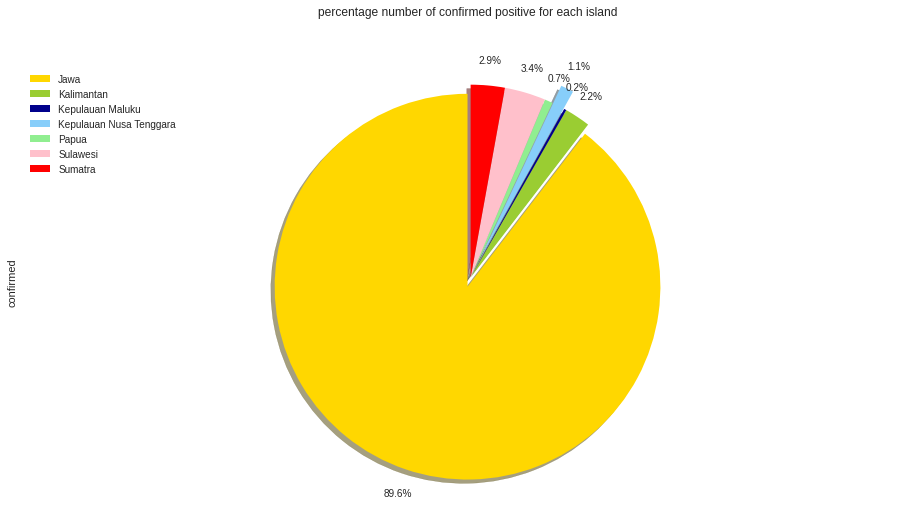

In [ ]:
df_confirmed = df_ds2.groupby('island', axis=0).sum()
print(type(df_confirmed.groupby('island', axis=0)))

colors_list = ['gold', 'yellowgreen', 'darkblue', 'lightskyblue', 'lightgreen', 'pink','red']
explode_list = [0.05, 0, 0, 0.1, 0.0, 0.0,0] 

df_confirmed['confirmed'].plot(kind='pie',
                            figsize=(16, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.13,    
                            explode=explode_list,
                            colors=colors_list
                            )


plt.title('percentage number of confirmed positive for each island', y=1.1) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_confirmed.index, loc='upper left') 

plt.show()